In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
# import plotly.express as px 

In [2]:
SDB = sqlite3.connect('Auto2.db')
Cs = SDB.cursor()

sql="""select * from Autopliuslt;"""
df = pd.read_sql_query(sql, con=SDB)
df

,ID,Marke,Modelis,Kaina,Rida,Variklis,Kuras,PavaruDeze,VarantiejiRatai,BaterijosTalpakWh,...,Ilgis,Aukstis,TechApžiuraIki,COemisijagkm,EuroStandartas,TarsosMokestis,SDK,KlimatoValdymas,SedimosVietos,Ratlankiai
0,A26837939,BMW,428 Gran Coupe,18 000,199 000 km,"1997 cm³, 245 AG (180kW)",Benzinas,Automatinė,Visi varantys (4х4),None,...,None,None,None,~ 147 g/km,None,~ 40.47 €,None,Klimato kontrolė,5,None
1,A26842557,Volkswagen,Golf,7 100,314 086 km,"1598 cm³, 105 AG (77kW)",Dyzelinas,Automatinė,Priekiniai,None,...,None,None,None,104 g/km,Euro 5,0 €,AHETH...\n Rodyti,Klimato kontrolė,5,R16
2,A26862175,Fiat,500X,10 500,126 211 km,"2360 cm³, 177 AG (130kW)",Benzinas / dujos,Automatinė,Visi varantys (4х4),None,...,None,None,2026-10,None,None,None,None,Oro kondicionierius,5,R18
3,A25949486,Skoda,Octavia,2 500,318 000 km,"1896 cm³, 105 AG (77kW)",Dyzelinas,Mechaninė,Priekiniai,None,...,None,None,2025-09,135 g/km,None,40.47 €,RKPNP...\n Rodyti,Oro kondicionierius,5,None
4,A26858421,BMW,525,4 499,270 000 km,"2500 cm³, 197 AG (145kW)",Dyzelinas,Automatinė,Galiniai,None,...,None,None,2025-06,171 g/km,None,202.35 €,FFNAC...\n Rodyti,Oro kondicionierius,5,R17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,A26637231,Lexus,CT 200h,8 900,113 000 km,"1798 cm³, 136 AG (100kW)",Benzinas / elektra / dujos,Automatinė,Priekiniai,None,...,None,None,None,87 g/km,None,None,None,None,5,None
1258,A26637711,Lexus,CT 200h,8 900,189 000 km,"1798 cm³, 136 AG (100kW)",Benzinas / elektra,Automatinė,Priekiniai,None,...,None,None,None,87 g/km,None,0 €,None,None,5,R17
1259,A26047380,Toyota,Yaris,8 900,163 879 km,"1496 cm³, 111 AG (82kW)",Benzinas,Mechaninė,Priekiniai,None,...,None,None,2024-11,116 g/km,None,0 €,None,Oro kondicionierius,5,None
1260,A26254076,Toyota,Yaris,8 900,169 924 km,"1496 cm³, 111 AG (82kW)",Benzinas,Mechaninė,Priekiniai,None,...,None,None,2025-01,116 g/km,None,0 €,None,Oro kondicionierius,5,None


In [5]:
df.columns

Index(['ID', 'Marke', 'Modelis', 'Kaina', 'Rida', 'Variklis', 'Kuras',
       'PavaruDeze', 'VarantiejiRatai', 'BaterijosTalpakWh',
       'ElektraNuvažiuojamasAtstumas', 'Ikraunamas', 'Defektai', 'Spalva',
       'KebuloTipas', 'Vairas', 'VidutinesSanaudos', 'MiesteSanaudos',
       'UzmiestyjeSanaudos', 'PirmaRegistracija',
       'PirmosiosRegistracijosSalis', 'BendrojiMase', 'NuosavaMase',
       'DuruSkaicius', 'KebuloNr', 'Ilgis', 'Aukstis', 'TechApžiuraIki',
       'COemisijagkm', 'EuroStandartas', 'TarsosMokestis', 'SDK',
       'KlimatoValdymas', 'SedimosVietos', 'Ratlankiai'],
      dtype='object')

In [14]:
def rida(x):
    if x == 'None':
        return np.nan
    else:
        return int(x.replace(' ', '').replace('km', ''))

def kaina(x):
    if x == 'None':
        return np.nan
    else:
        return int(x.replace(' ', ''))

def amzius(x):
    if x == 'None':
        return np.nan
    else:
        return 2024 - int(x[:4])

def galia(x):
    if 'kW' in x:
        return int(x.split('(')[-1][:-3])
    else:
        return np.nan
    
df['price'] = df['Kaina'].apply(kaina)
df['amzius'] = df['PirmaRegistracija'].apply(amzius)
df['rid'] = df['Rida'].apply(rida)
df['galia'] = df['Variklis'].apply(galia)



<function matplotlib.pyplot.show(close=None, block=None)>

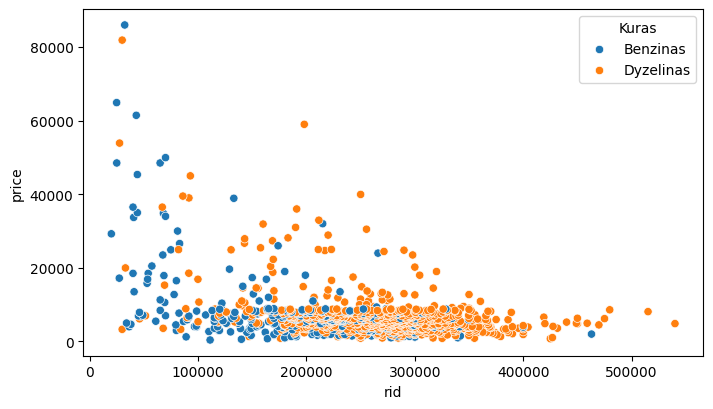

In [28]:
fig, ax = plt.subplots(figsize=(8, 4.5))

sns.scatterplot(data=df[(df['Kuras'] == 'Benzinas') | (df['Kuras'] == 'Dyzelinas')], x='rid', y='price', hue='Kuras')
# plt.legend()
plt.show